# TMA 01, question 2 (40 marks)

**Name**: [Enter your name here]
    
**PI**: [Enter your student id here]


In this question, you will examine a set of data which represents the number of billionaires in the world, as published by [Forbes](https://www.forbes.com/billionaires), and collated as a [CORGIS](https://think.cs.vt.edu/corgis/csv/billionaires/billionaires.html) set.

The tasks in this notebook can be addressed using the techniques discussed in parts 2-5 of the module materials, and the associated notebooks.

The question has four parts, looking at different parts of the data analysis pipeline. 

Record all your activity and observations in this notebook. Generate additional notebook cells as required.

In [1]:
# Load the necessary libraries here:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import seaborn as sn

# If you require additional libraries to answer any questions 
# then import them as necessary.

<font color='red'>AW: I tend to import seaborn by default, as it makes the graphs a bit prettier. I think this is suggested somewhere to the students, but if not, it doesn't matter.</font> 

## <a name="contents"></a> Contents
* [Importing and cleaning the data](#import) (15 marks)
* [Visualising billionaires by country](#country) (10 marks)
* [Total billionaires' wealth by category](#category) (15 marks)


## <a name="import"></a> Importing and cleaning the data (11 marks)
([Contents](#contents))



In this part of the question you will load and prepare the data file, making some adjustments for missing data in the original file.



Read the csv file <code>billionaires.csv</code> in the directory <code>datasets</code> into a dataframe called <code>billionaires_df</code> and display the first 5 rows. *(1 mark)*

**1.** First, load the data, and place it in a dataframe named <code>billionaires_df</code>. *(1 mark)*

In [2]:
# Enter your code here

# Notebook 02.2.2
billionaires_df=pd.read_csv('datasets/billionaires.csv')
billionaires_df.head(n=5)

# AW: I've put n=5 as the argument to head() for 
# completeness, but n defaults to 5 so it doesn't need
# to be explicit.

,age,category,citizenship,company.name,company.type,country code,founded,from emerging,gdp,gender,...,name,rank,region,relationship,sector,was founder,was political,wealth.type,worth in billions,year
0,-1,Financial,Saudi Arabia,Rolaco Trading and Contracting Company,new,SAU,1968,True,1.580000e+11,male,...,Abdul Aziz Al-Sulaiman,404,Middle East/North Africa,founder,construction,True,False,self-made finance,1.0,1996
1,34,Financial,United States,Fidelity Investments,new,USA,1946,True,8.100000e+12,female,...,Abigail Johnson,145,North America,relation,investment banking,True,False,inherited,2.5,1996
2,59,Non-Traded Sectors,Brazil,Companhia Brasileira de Distribui?ao,new,BRA,1948,True,8.540000e+11,male,...,Abilio dos Santos Diniz,322,Latin America,relation,retail,True,False,inherited,1.2,1996
3,61,New Sectors,Germany,Ratiopharm,new,DEU,1881,True,2.500000e+12,male,...,Adolf Merckle,388,Europe,relation,pharmaceuticals,True,False,inherited,1.0,1996
4,-1,Financial,Hong Kong,Swire,new,HKG,1816,True,1.600000e+11,male,...,Adrian and John Swire,162,East Asia,relation,trading company,True,False,inherited,2.2,1996


**2.** In the dataset there is a column whose name is <code>company.type</code>. In this column in the csv file, there are several missing values. How many values are missing? *(2 marks)*

In [3]:
# Enter your code here

# Notebooks 03.2 and 03.4
# We can select the rows for which company.type is null using the isnull() method
# on the company.type series, and using that as a selector:
billionaires_df[billionaires_df['company.type'].isnull()]

# Then use the standard len function to get the answer:
len(billionaires_df[billionaires_df['company.type'].isnull()])

36

In [4]:
# An alternative is to write a loop:
i=0
for tv in billionaires_df['company.type'].isnull():
    if tv:
        i+=1
i

36

**3.** Update your dataframe <code>billionaires_df</code> so that the missing values in the <code>company.type</code> column are replaced with the string "unknown". Then display 5 rows for which the value of <code>company.type</code> is "unknown". *(4 marks)*

In [5]:
# Enter your code here

# Notebooks 03.2 and 03.4
billionaires_df['company.type'].fillna('unknown', inplace=True)
billionaires_df[billionaires_df['company.type']=='unknown'].head(n=5)

,age,category,citizenship,company.name,company.type,country code,founded,from emerging,gdp,gender,...,name,rank,region,relationship,sector,was founder,was political,wealth.type,worth in billions,year
31,-1,Traded Sectors,Mexico,NaN,unknown,MEX,0,True,3.970000e+11,NaN,...,Autrey family,400,Latin America,NaN,NaN,True,False,NaN,1.0,1996
44,-1,Financial,Thailand,NaN,unknown,THA,0,True,1.820000e+11,male,...,Boonsong Asavabhokhin,408,East Asia,NaN,NaN,True,False,NaN,1.0,1996
64,-1,Non-Traded Sectors,Germany,Sirosa,unknown,DEU,0,True,2.500000e+12,NaN,...,Conle famle,328,Europe,NaN,real estate,True,False,NaN,1.2,1996
93,53,Financial,Japan,NaN,unknown,JPN,0,True,4.710000e+12,male,...,Eitaro Itoyama,155,East Asia,NaN,golf courses,True,False,self-made finance,2.3,1996
115,-1,Non-Traded Sectors,Germany,NaN,unknown,DEU,0,True,2.500000e+12,NaN,...,Funke family,174,Europe,NaN,NaN,True,False,NaN,2.1,1996


**4.** There are some typos in the "company type" column: "new" has sometimes been entered with unwanted whitespace (" new", "new "), and has sometimes been incorrectly entered as "neew". Correct each of these so they all contain the string "new". *(3 marks)*

In [6]:
# Enter your code here

# Notebook 03.1
billionaires_df['company.type']=billionaires_df['company.type'].str.strip()
billionaires_df['company.type']=billionaires_df['company.type'].str.replace('neew', 'new')

# Don't penalise students who also use "...str.replace(' new', 'new'):
# both methods are acceptable, but I think it's easier to start with 
# the one at the top of the notebook


**5.** Finally, we would like to fill in the missing data in the "gender" column. However, the fill result is to be different depending on whether the billionaire is an individual or a family. The two cases are:

- If the row's value in the "gender" column is undefined, and the value in the "name" column contains the word "family" (such as "Autrey Family" in row 31), then the "gender" column should be updated to contain the string "family".

- If the row's value in the "gender" column is undefined, and the value in the "name" column does not contain the word "family", then the "gender" column should be updated to contain the string "other".

*(5 marks)*


<font color='red'>Note that "family" appears both in upper case and in lower case in the "name" column. Students should identify this for themselves when examining the data. Give a maximum of 4 marks to students who miss either set of strings.</font>

In [7]:
# However, students who are not seasoned python or R users
# will almost certainly not get this solution. I would
# expect most students to propose a solution using a loop:

# Notebook 02.1
for i in billionaires_df.index:
    if (pd.isnull(billionaires_df['gender'][i]) and 
        'family' in billionaires_df['name'][i].lower()):
        billionaires_df['gender'][i]='family'
        
billionaires_df['gender'].fillna('other', inplace=True)

# A couple of illustrative results (not asked for in the question):
billionaires_df.loc[[31, 291, 365]].T

# This is not pythonic, but is how I'd expect someone without any
# experience of functional programming to address the task. Also,
# this version throws a warning; I'm not sure why.

# This can be treated as a teaching point to show that it is
# *possible* in pandas, but in practice you'd probably use Open
# Refine at this stage in the analysis.

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


,31,291,365
age,-1,-1,-1
category,Traded Sectors,Financial,Traded Sectors
citizenship,Mexico,Japan,South Korea
company.name,NaN,NaN,NaN
company.type,unknown,unknown,unknown
country code,MEX,JPN,KOR
founded,0,0,0
from emerging,True,True,True
gdp,3.97e+11,4.71e+12,6.03e+11
gender,family,family,other


## <a name="country"></a> Visualising billionaires by country (10 marks)
([Contents](#contents))



For this section, you will create a bar chart showing the number of billionaires with citizenship in each country. Your response to this section does not depend on any changes you may have made in the previous parts of this notebook: your answers here can use your original version of <code>billionaires_df</code> or the version with the missing data filled in.

If you examine the "year" column of the csv file, you will see that the data in the file is collected for the years 1996, 2001 and 2014.

** 6. ** You are required to plot a bar chart with the name of each country on the X axis, taken from the "citizenship" column, and on the Y axis, the number of billionaires with citizenship from that country. Your graph should contain *only* the 2014 data. Your graph should also have an appropriate title and axis labels.

**Hint**: You may find it useful to start by creating a dataframe containing just the data needed for the plot.

*5 marks*

In [8]:
# Enter your code here

# Students will need to recognise that they need to group the
# data in some way to get into the right form for plotting.
# There are different ways of doing this, including pivot
# tables, crosstabs or groupby. Let's use crosstabs here:

# Notebook 04.1 and 04.3

dataToPlot_df=pd.crosstab(billionaires_df['citizenship'],
                          billionaires_df['year'])

# (The students are not specifically asked for this intermediate dataframe,
# but it's what the hint suggests)
dataToPlot_df.head()

year,1996,2001,2014
citizenship,,,
Algeria,0,0,1
Angola,0,0,1
Argentina,3,4,5
Australia,1,3,29
Austria,0,0,10


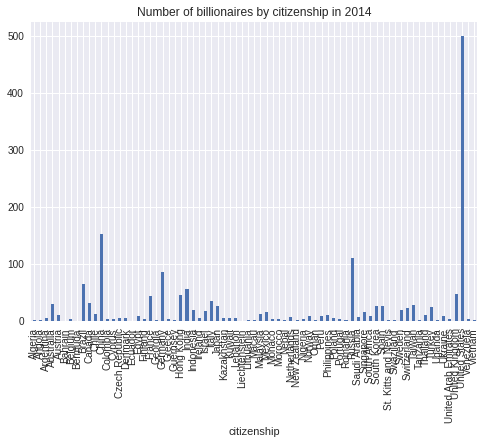

In [9]:
# Now that we've got the data, do a bar chart for 2014:

dataToPlot_df[2014].plot.bar(title="Number of billionaires by citizenship in 2014")


**7.** Your graph probably looks very cluttered. You should now plot the same graph, but only including those countries which have *more than 20* citizens who are billionaires. *(5 marks)*

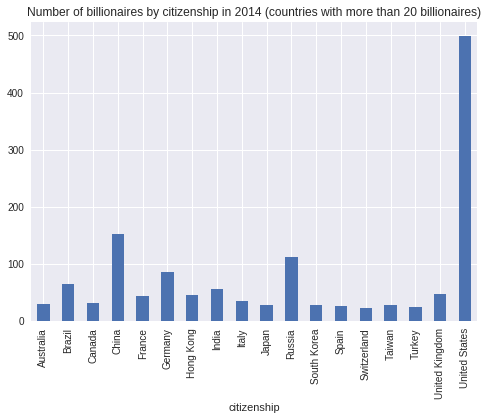

In [10]:
# Enter your code here

# In this case, it is probably easiest to create a new dataframe
# from the 2014 data in the existing dataToPlot_df dataframe

data2014_df=dataToPlot_df[2014]

data2014_df[data2014_df>20].plot.bar(title="Number of billionaires by citizenship in 2014 (countries with more than 20 billionaires)")

## <a name="category"></a> Total billionaires' wealth by category (15 marks)
([Contents](#contents))

For this section, you will create a graph showing how the amount of wealth owned by the world's billionaires has changed (or not) depending on the category from which the money is made. Your response to this section does not depend on any changes you may have made in the previous parts of this notebook: your answers here can use your original version of <code>billionaires_df</code> or the version with the missing data filled in.

**8.** To investigate the categories from which the billionaires' wealth was made, you decide to plot the data in the graph to show the total wealth, the year, and the category. The plot should show:
    
- The x axis should show years in the range covered by the dataset
- The y axis should show the total wealth of the billionaires working in that category. The total wealth should be the sum of the values in the "worth in billions" column, and the categories are the values in the "category" column.
- There should be several line graphs plotted, one for each different category, showing the total wealth of all the billionaires working in that sector in the given year.
- Do not include categories which do not appear in each of the years 1996, 2001 and 2014.
- The graph should have an appropriate title and legend.

*(12 marks)*

As before, you may find it helpful to define an intermediate dataframe from which to plot the final figure.

<font color='red'>AW: is this description clear enough? If not, how to change?</font>

In [11]:
# Enter your code here.

# notebook 04.1
# This question requires a sum rather than a count, so a pivot
# table should be used rather than a crosstab.

# Start by creating a basic pivot table

plot_df=billionaires_df.pivot_table(index=['year'], columns=['category'], aggfunc=np.sum)['worth in billions']
plot_df

category,0,Finance,Financial,New Sectors,Non-Traded Sectors,Resource Related,Traded Sectors,Trucking,energy
year,,,,,,,,,
1996,19.9,1.3,354.5,122.9,251.2,53.3,245.2,1.2,NaN
2001,35.5,NaN,413.1,300.7,512.2,83.3,383.8,NaN,NaN
2014,145.5,NaN,1821.0,899.9,1486.8,705.4,1388.9,NaN,1.9


In [12]:

# Notebooks 03.4 and 04.7

# Next, remove those columns which contain NaN. Pythonic way is to use:

# plot_df.dropna(axis=1, inplace=True)

# However, the axis argument isn't the clearest, so we can use .T or 
# .transpose() to apply to columns instead of rows:

plot_df=plot_df.T.dropna().T
plot_df

category,0,Financial,New Sectors,Non-Traded Sectors,Resource Related,Traded Sectors
year,,,,,,
1996,19.9,354.5,122.9,251.2,53.3,245.2
2001,35.5,413.1,300.7,512.2,83.3,383.8
2014,145.5,1821.0,899.9,1486.8,705.4,1388.9


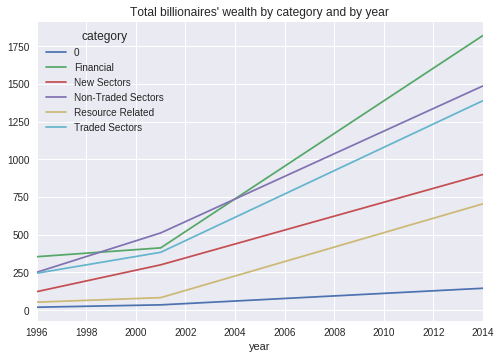

In [13]:
# And finally, plot the graph:

plot_df.plot(title="Total billionaires' wealth by category and by year")

**9.** Finally, what does your plot tell you about the total wealth held by category? *(3 marks)*

*Enter your answer here*

<font color='red'>AW: Give marks for any appropriate comments. Students will probably note that the financial category has the highest wealth associated in 2014, as well as the highest rate of growth. The category "0" probably represents "others", and in any case, represents the lowest category by associated wealth.